Homework #1

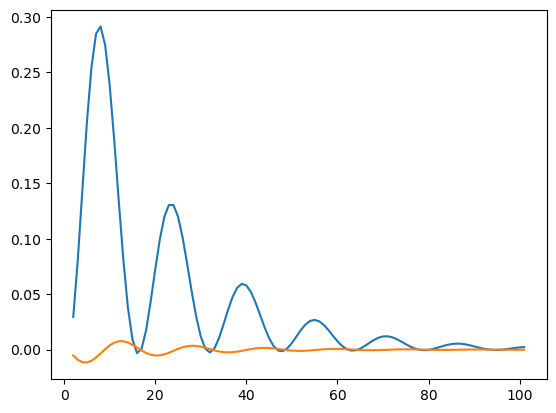

In [14]:
import numpy as np
from matplotlib import pyplot as plt

def dfxn(x,y):
    return -y/2+4*np.exp(-0.5*x)*np.cos(4.0*x)

def fxn(x):
    return np.exp(-0.5*x)*np.sin(4.0*x)

def int_eul(x,y,dx):
    return y+dx*dfxn(x,y)

def int_heun(x,y,dx):
    ystar=y+dx*dfxn(x,y)
    xp=x+dx
    return y+0.5*dx*(dfxn(x,y)+dfxn(xp,ystar))

x0=0.0
x1=10.0
dx=0.1
y0=0.0
e0=0.0

y_eu=y0
y_he=y0

eul_arr=[]
heun_arr=[]
n_arr=[]

n=1
x=x0

while (x<(x1-0.5*dx)):
    n=n+1
    y_eu=int_eul(x,y_eu,dx)
    y_he=int_heun(x,y_he,dx)
    x=x+dx
    y_sol=fxn(x)
    eul_arr.append(y_eu-y_sol)
    heun_arr.append(y_he-y_sol)
    n_arr.append(n)

plt.plot(n_arr,eul_arr)
plt.plot(n_arr,heun_arr)

plt.show()

Correction to Homework #1

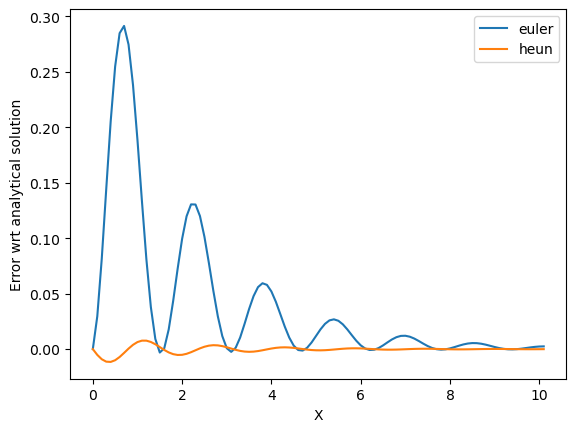

In [43]:
import numpy as np
from matplotlib import pyplot as plt

def dfxn(x,y):
    return -y/2+4*np.exp(-0.5*x)*np.cos(4.0*x)

def fxn(x):
    return np.exp(-0.5*x)*np.sin(4.0*x)

def int_eul(x,y,dx):
    return y+dx*dfxn(x,y)

def int_heun(x,y,dx):
    ystar=y+dx*dfxn(x,y)
    xp=x+dx
    return y+0.5*dx*(dfxn(x,y)+dfxn(xp,ystar))

x0=0.0
x1=10.0
dx=0.1
y0=0.0
e0=0.0

y_eu=y0
y_he=y0

eul_arr=[0.0,]
heun_arr=[0.0,]
x_arr=[x0]

n=1
x=x0

while (x < x1):
    y_eu=int_eul(x,y_eu,dx)
    y_he=int_heun(x,y_he,dx)
    n=n+1
    x=x+dx
    y_sol=fxn(x)
    x_arr.append(x)
    eul_arr.append(y_eu-y_sol)
    heun_arr.append(y_he-y_sol)

plt.plot(x_arr,eul_arr, label='euler')
plt.plot(x_arr,heun_arr, label='heun')
plt.xlabel('X')
plt.ylabel('Error wrt analytical solution')
plt.legend( )
plt.show()

Homework #2

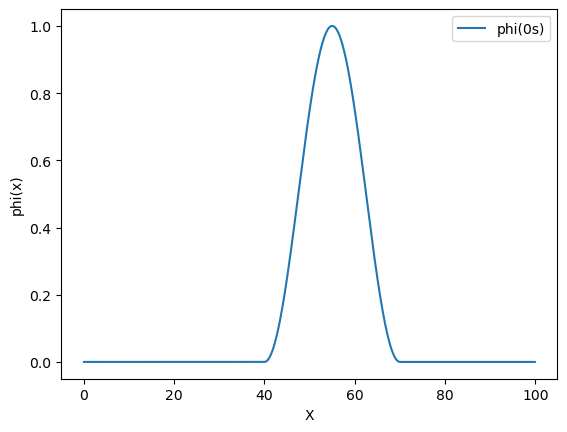

In [52]:
import numpy as np
from matplotlib import pyplot as plt
    
def phi0(x): #fxn for t=0, 40<=x<=70
    if (x>=40 and x<=70):
        return np.sin(np.pi*((x-40.)/30.))**2
    else:
        return 0.0

dx=0.10 #0.10m
u=0.087 #0.087m/s
dt=dx/u #dt=dx/u for c=1, no damping
c=u*dt/dx #c=1
t=0 #0s initial t
t1=1000 #1000s final t
x0=0 #0m initial x
x1=100 #100m final x

x=np.arange(x0,x1,dx) #1D array of x-values between x0 and x1 with step nx
phi=[phi0(a) for a in x] #apply phi0 function to all x in array to fill phi array
plt.plot(x,phi, label='phi('+str(round(t))+'s)')
plt.xlabel('X')
plt.ylabel('phi(x)')
plt.legend( )
plt.show()

0
199.99999999999923
400.00000000000045
599.9999999999987
799.9999999999915
999.9999999999842


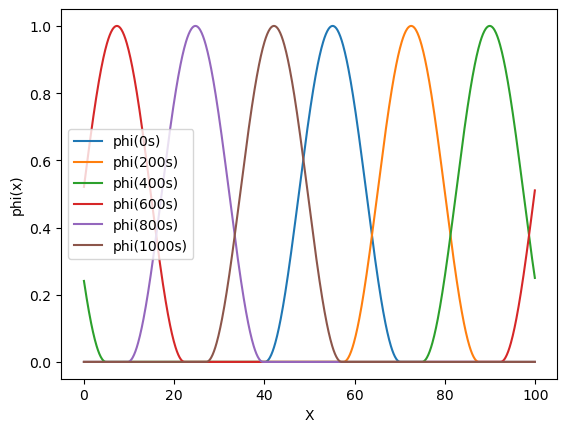

In [19]:
import numpy as np
from matplotlib import pyplot as plt
    
def phi0(x): #fxn for t=0, 40<=x<=70
    if (x>=40 and x<=70):
        return np.sin(np.pi*((x-40.)/30.))**2
    else:
        return 0.0

def ftfs(phi_now): #forward time, forward space
    return (1+c)*phi_now-c*np.roll(phi_now,-1) 

def ftbs(phi_now): #forward time, backward space
    return (1-c)*phi_now+c*np.roll(phi_now,1)

dx=0.10 #0.10m
u=0.087 #0.087m/s
dt=dx/u #dt=dx/u for c=1, no damping
c=u*dt/dx #c=1
t=0 #0s initial t
t1=1000 #1000s final t
x0=0 #0m initial x
x1=100 #100m final x

x=np.arange(x0,x1,dx) #1D array of x-values between x0 and x1 with step nx
phi=[phi0(a) for a in x] #apply phi0 function to all x in array to fill phi array
phi=np.array(phi)

while (t<t1):
    if (u>0):
        phi_new=ftbs(phi) #ftbs is stable if u>0
    else:
        phi_new=ftfs(phi) #ftfs is stable if u<0
    phi=phi_new
    if (t==0) or (round(t)%200==0):
        print(t)
        plt.plot(x,phi, label='phi('+str(round(t))+'s)')
    t=t+dt

plt.xlabel('X')
plt.ylabel('phi(x)')
plt.legend( )
plt.show()

Homework #3

Two-variable Taylor Expansion of 1D Advection Equation

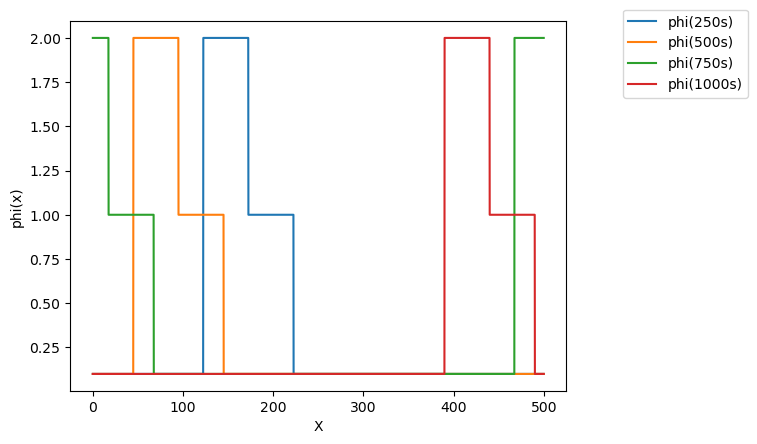

In [105]:
import numpy as np
from matplotlib import pyplot as plt

def phi0(x):
    if (x<200):
        return 0.1
    elif (200<=x<250):
        return 2.0
    elif (250<=x<=300):
        return 1.0
    elif (x>300):
        return 0.1

def ftfs(phi_now):
    return (1+c)*phi_now-c*np.roll(phi_now,-1)

def ftbs(phi_now):
    return (1-c)*phi_now+c*np.roll(phi_now,1)

def ctcs(phi_old,phi_now):
    return phi_old-c*(np.roll(phi_now,-1)-np.roll(phi_now,1))

c=-1.
dx=0.10 #0.10m
u=-0.31 #0.8m/s
dt=c*dx/u #dt=dx/u for c=1, no damping
t=0 #0s initial t
t1=1000 #1000s final t
x0=0 #0m initial x
x1=500 #500m final x
alpha=0.0
beta=0.0

x=np.arange(x0,x1,dx) #1D array of x-values between x0 and x1 with step nx
phi_old=[phi0(a) for a in x] #apply phi0 function to all x in array to fill phi array
phi_old=np.array(phi_old)
phi_now=phi_old
d=phi_old
 
if (u>0):
    phi_now=ftbs(phi_old)
else:
    phi_now=ftfs(phi_old)
    
t=t+dt

while(t<=t1+1):
    phi_new=ctcs(phi_old,phi_now)
    d=alpha*(phi_old+phi_new-2.0*phi_now)
    phi_old=phi_now+beta*d
    phi_now=phi_new+(1-beta)*d
    if (t==0) or (round(t,2)%250.==0):
        plt.plot(x,phi_now, label='phi('+str(round(t))+'s)')
    t=t+dt

plt.xlabel('X')
plt.ylabel('phi(x)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

/tmp/ipykernel_409/182060751.py:49: RuntimeWarning: overflow encountered in subtract
  d=alpha*(phi_old+phi_new-2.0*phi_now)
/tmp/ipykernel_409/182060751.py:50: RuntimeWarning: invalid value encountered in multiply
  phi_old=phi_now+beta*d
/tmp/ipykernel_409/182060751.py:21: RuntimeWarning: invalid value encountered in subtract
  return phi_old-c*(np.roll(phi_now,-1)-np.roll(phi_now,1))


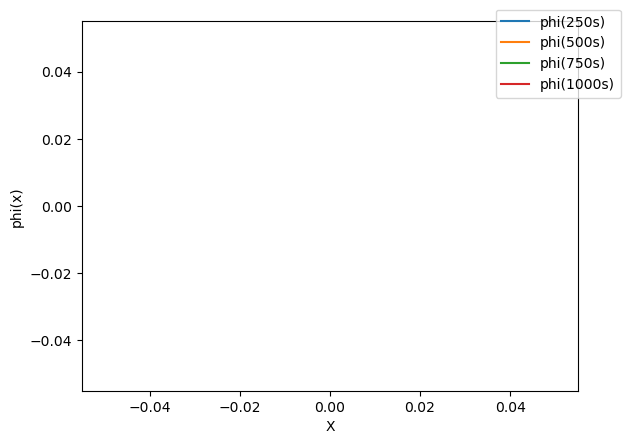

In [100]:
import numpy as np
from matplotlib import pyplot as plt

def phi0(x):
    if (x<200):
        return 0.1
    elif (200<=x<250):
        return 2.0
    elif (250<=x<=300):
        return 1.0
    elif (x>300):
        return 0.1

def ftfs(phi_now):
    return (1+c)*phi_now-c*np.roll(phi_now,-1)

def ftbs(phi_now):
    return (1-c)*phi_now+c*np.roll(phi_now,1)

def ctcs(phi_old,phi_now):
    return phi_old-c*(np.roll(phi_now,-1)-np.roll(phi_now,1))

c=-0.1
dx=0.10 #0.10m
u=-0.31 #0.8m/s
dt=c*dx/u #dt=dx/u for c=1, no damping
t=0 #0s initial t
t1=1000 #1000s final t
x0=0 #0m initial x
x1=500 #500m final x
alpha=0.1
beta=0.0

x=np.arange(x0,x1,dx) #1D array of x-values between x0 and x1 with step nx
phi_old=[phi0(a) for a in x] #apply phi0 function to all x in array to fill phi array
phi_old=np.array(phi_old)
phi_now=phi_old
d=phi_old
 
if (u>0):
    phi_now=ftbs(phi_old)
else:
    phi_now=ftfs(phi_old)
    
t=t+dt

while(t<=t1+1):
    phi_new=ctcs(phi_old,phi_now)
    d=alpha*(phi_old+phi_new-2.0*phi_now)
    phi_old=phi_now+beta*d
    phi_now=phi_new+(1-beta)*d
    if (t==0) or (round(t,2)%250.==0):
        plt.plot(x,phi_now, label='phi('+str(round(t))+'s)')
    t=t+dt

plt.xlabel('X')
plt.ylabel('phi(x)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

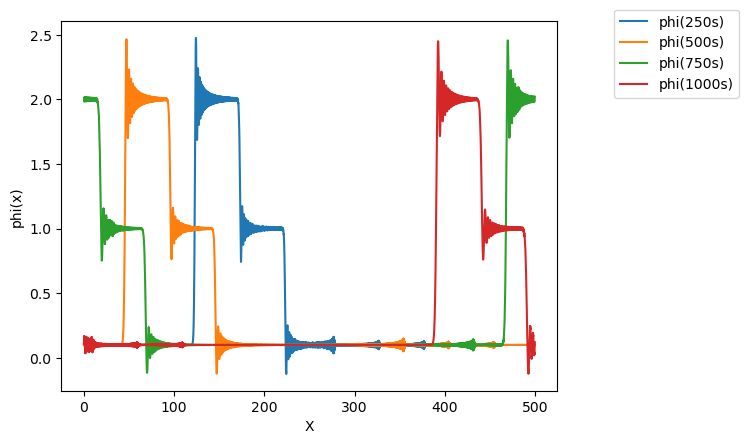

In [95]:
import numpy as np
from matplotlib import pyplot as plt

def phi0(x):
    if (x<200):
        return 0.1
    elif (200<=x<250):
        return 2.0
    elif (250<=x<=300):
        return 1.0
    elif (x>300):
        return 0.1

def ftfs(phi_now):
    return (1+c)*phi_now-c*np.roll(phi_now,-1)

def ftbs(phi_now):
    return (1-c)*phi_now+c*np.roll(phi_now,1)

def ctcs(phi_old,phi_now):
    return phi_old-c*(np.roll(phi_now,-1)-np.roll(phi_now,1))

c=-0.1
dx=0.10 #0.10m
u=-0.31 #0.8m/s
dt=c*dx/u #dt=dx/u for c=1, no damping
t=0 #0s initial t
t1=1000 #1000s final t
x0=0 #0m initial x
x1=500 #500m final x
alpha=0.05
beta=0.53

x=np.arange(x0,x1,dx) #1D array of x-values between x0 and x1 with step nx
phi_old=[phi0(a) for a in x] #apply phi0 function to all x in array to fill phi array
phi_old=np.array(phi_old)
phi_now=phi_old
d=phi_old
 
if (u>0):
    phi_now=ftbs(phi_old)
else:
    phi_now=ftfs(phi_old)
    
t=t+dt

while(t<=t1+1):
    phi_new=ctcs(phi_old,phi_now)
    d=alpha*(phi_old+phi_new-2.0*phi_now)
    phi_old=phi_now+beta*d
    phi_now=phi_new+(1-beta)*d
    if (t==0) or (round(t,2)%250.==0):
        plt.plot(x,phi_now, label='phi('+str(round(t))+'s)')
    t=t+dt

plt.xlabel('X')
plt.ylabel('phi(x)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()